Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2821.9082
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5934
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7765
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7135
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7052
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.0805
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.7475
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6250
Epoch 9/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.2576
Epoch 10/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.8597
Epoch 11/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4401
Epoch 12/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.5383
Epoch 13/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.0369
Epoch 14/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4150
Epoch 15/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.8754
Epoch 16/20
88/88 ━━━━━━━━

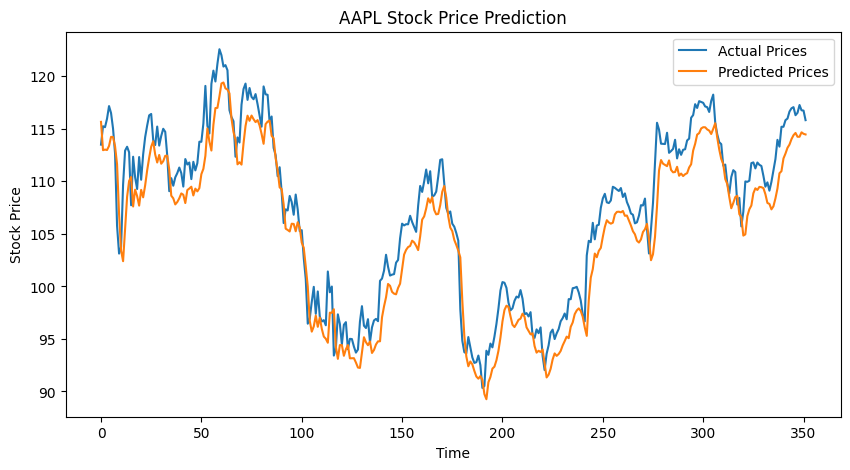

In [3]:
# Install required libraries (uncomment if running in Colab or Jupyter)
# !pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

# Load the dataset
prices = pd.read_csv('/content/prices-split-adjusted.csv', parse_dates=['date'])

# Filter for Apple Inc. (AAPL)
apple = prices[prices['symbol'] == 'AAPL'].sort_values('date')

# Use only 'close' prices
df = apple[['date', 'close']].copy()
df.set_index('date', inplace=True)

# Create lag features
for i in range(1, 6):
    df[f'lag_{i}'] = df['close'].shift(i)

# Drop rows with missing values
df.dropna(inplace=True)

# Features and Target
X = df.drop('close', axis=1).values
y = df['close'].values

# Train-test split (no shuffle to maintain time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM: [samples, timesteps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, verbose=1)

# Predict
y_pred = model.predict(X_test_lstm)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Visualization
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
